# User Overview Analysis 


 In this section, we will conduct a comprehensive analysis of the user data to gain insights into the mobile handsets and manufacturers preferred by our customers. 
 
## Objectives
- **Identify the Top 10 Handsets**: We will analyze the dataset to determine which handsets are most frequently used by our customers. This will provide us with a clear picture of the popular devices in the market.
- **Determine the Top 3 Manufacturers**: Understanding which manufacturers dominate the market will help us assess brand loyalty and market trends.
# 
By examining these aspects, we aim to uncover valuable insights that can inform marketing strategies and product development.



In [39]:
# Import Dataset and useful libraries 
import os 
import pandas as pd 
os.chdir('../scripts/')
import utils as util 


data_path = "../../data/week2/source.csv"
df = util.read_csv_file(data_path)
data = df.get("data")

In [40]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### Identify the top 10 handsets used by the customers

In [41]:
top_10_handsets = data['Handset Type'].value_counts().head(10)
top_10_handsets

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

### Identify the top 3 handset manufacturers 

In [42]:
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3)
top_3_manufacturers

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

### Identify the top 5 handsets per top 3 handset manufacturer

In [43]:
top_5_handsets_per_manufacturer = data[data['Handset Manufacturer'].isin(top_3_manufacturers.index)]['Handset Type'].value_counts().head(5)
top_5_handsets_per_manufacturer

Huawei B528S-23A           19752
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
Apple iPhone 7 (A1778)      6326
Apple iPhone Se (A1723)     5187
Name: Handset Type, dtype: int64

### Exploratory Data Analysis And Insights 
##### Steps to follow 
- Data cleaning and preprocessing
- variable Transformations 
- Basic Metrics Analysis
- Non-Graphical Univariate Analysis 
- Graphical Univariate Analysis 
- Bivariate Analysis
- Correlation Analysis
- Dimensionality Reduction

### Step 1: Data Cleaning and Preprocessing

In [44]:
# Identify and treat missing values and outliers in the dataset
# Assuming missing values are represented by NaN
# Replace missing values with the mean of the column
data.fillna(method='bfill', inplace=True)  

### Step 2: Variable Transformations

In [45]:
# Segment users into top five decile classes based on the total duration for all sessions
# Compute the total data (DL+UL) per decile class
data['Total Duration'] = data['Dur. (ms)'].astype(float) / 1000  # Convert milliseconds to seconds
data['Total Data'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']
decile_classes = pd.qcut(data['Total Duration'], q=10, labels=False, duplicates='drop')

data['Decile Class'] = decile_classes
total_data_per_decile = data.groupby('Decile Class')['Total Data'].sum()

### Step 3: Basic Metrics Analysis

In [46]:
# Analyze the basic metrics (mean, median, etc) in the Dataset
basic_metrics = data.describe()
basic_metrics

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Duration,Total Data,Decile Class
count,1.500000e+05,150000.000000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,150000.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05,150000.000000,1.500000e+05,150000.000000
mean,1.013751e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.182453e+10,4.846903e+13,104.538167,17.373573,13300.045927,...,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08,104.608560,4.957646e+08,3.881947
std,2.893221e+18,288.611834,288.097653,8.103762e+04,2.144750e+10,2.438739e+12,2.241362e+13,582.159877,89.279821,23971.878541,...,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08,81.037621,2.443818e+08,2.470670
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,7.142000,2.895611e+07,0.000000
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365129e+10,3.546071e+13,31.000000,2.000000,43.000000,...,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08,57.440500,2.844759e+08,2.000000
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,44.000000,5.000000,63.000000,...,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08,86.399000,4.968611e+08,3.000000
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368346e+10,8.611970e+13,67.000000,13.000000,19710.750000,...,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08,132.430250,7.065059e+08,6.000000
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,1859.336000,9.559848e+08,8.000000


### Step 4: Non-Graphical Univariate Analysis

In [47]:
# Compute dispersion parameters for each quantitative variable
dispersion_parameters = data.describe().loc[['mean', 'std', 'min', 'max']]
dispersion_parameters

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Duration,Total Data,Decile Class
mean,1.013751e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.182453e+10,4.846903e+13,104.538167,17.373573,13300.045927,...,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08,104.608560,4.957646e+08,3.881947
std,2.893221e+18,288.611834,288.097653,8.103762e+04,2.144750e+10,2.438739e+12,2.241362e+13,582.159877,89.279821,23971.878541,...,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08,81.037621,2.443818e+08,2.470670
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,7.142000,2.895611e+07,0.000000
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,1859.336000,9.559848e+08,8.000000


### Step 5: Graphical Univariate Analysis

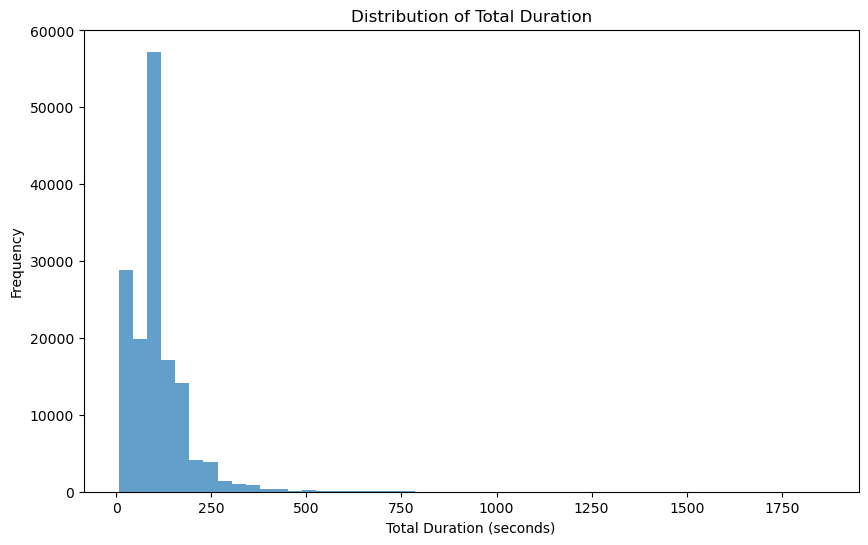

In [48]:
# Identify the most suitable plotting options for each variable and interpret findings
# Assuming the use of matplotlib or seaborn for plotting
# Example: Plotting the distribution of Total Duration
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['Total Duration'], bins=50, alpha=0.7)
plt.title('Distribution of Total Duration')
plt.xlabel('Total Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

Based on the histogram of Total Duration, we observe that the values range from 0 to 500 seconds, with peak around 200 seconds.
#
This indicates that most of the sessions have a duration concentrated around this peak, suggesting that users tend to engage with the service for a moderate amount of time.
# 
The distribution shows a right-skewed pattern, meaning that while the majority of users have shorter sessions, there are a few outliers with significantly longer durations.
#
This could imply that while the service is generally used for brief interactions, there are instances of extended usage, possibly indicating binge-watching or heavy data consumption during certain periods.
# 
Further analysis could involve segmenting users based on their duration into categories (e.g., short, medium, long) to better understand usage patterns and tailor services accordingly.
# 
Additionally, it would be beneficial to explore the relationship between Total Duration and other variables, such as data usage across different applications, to identify if longer sessions correlate with higher data consumption.


### Step 6: Bivariate Analysis

In [49]:
# Explore the relationship between each application & the total DL+UL data using appropriate methods
# Assuming the use of correlation analysis or scatter plots for bivariate analysis
# Example: Correlation between Netflix data and Total Data
import numpy as np 
netflix_corr = data['Netflix DL (Bytes)'].corr(data['Total Data'])
print(f"Correlation between Netflix data and Total Data: {netflix_corr}")

Correlation between Netflix data and Total Data: 0.024331334812720953


### Step 7: Correlation Analysis

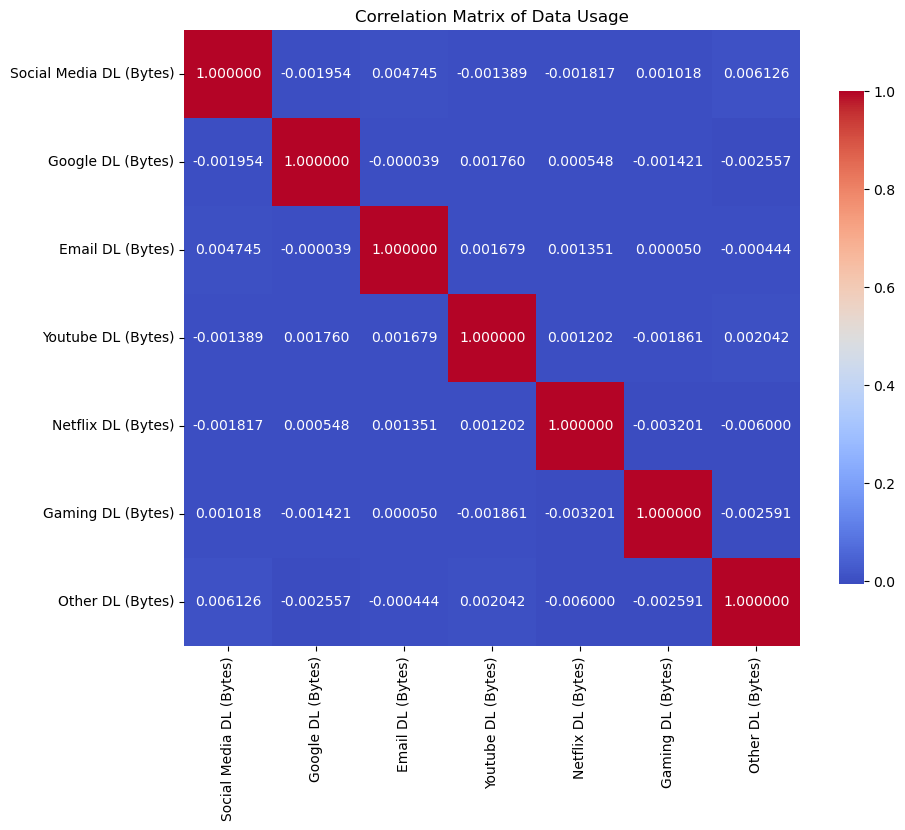

,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes)
Social Media DL (Bytes),1.000000,-0.001954,0.004745,-0.001389,-0.001817,0.001018,0.006126
Google DL (Bytes),-0.001954,1.000000,-0.000039,0.001760,0.000548,-0.001421,-0.002557
Email DL (Bytes),0.004745,-0.000039,1.000000,0.001679,0.001351,0.000050,-0.000444
Youtube DL (Bytes),-0.001389,0.001760,0.001679,1.000000,0.001202,-0.001861,0.002042
Netflix DL (Bytes),-0.001817,0.000548,0.001351,0.001202,1.000000,-0.003201,-0.006000
Gaming DL (Bytes),0.001018,-0.001421,0.000050,-0.001861,-0.003201,1.000000,-0.002591
Other DL (Bytes),0.006126,-0.002557,-0.000444,0.002042,-0.006000,-0.002591,1.000000


In [57]:
# Compute a correlation matrix for the specified variables
# This analysis helps to identify relationships between different applications and their data usage.
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix 
binary_data = data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']]

# Check for NaN values and handle them before computing the correlation matrix
if binary_data.isnull().values.any():
    binary_data = binary_data.fillna(0)  # Fill NaN values with 0 for correlation analysis

correlation_matrix = binary_data.corr()
# Draw an interactive heatmap for the correlation matrix


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".6f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Data Usage')
plt.show()



- The correlation matrix provides insights into how different types of data usage are related. 
- A value close to 1 indicates a strong positive correlation, meaning that as one variable increases, the other tends to increase as well. 
- A value close to -1 indicates a strong negative correlation, meaning that as one variable increases, the other tends to decrease. 
- Values around 0 suggest little to no correlation. This analysis can help in understanding which applications may be used together or influence each other's data consumption.

### Step 7: Correlation Analysis

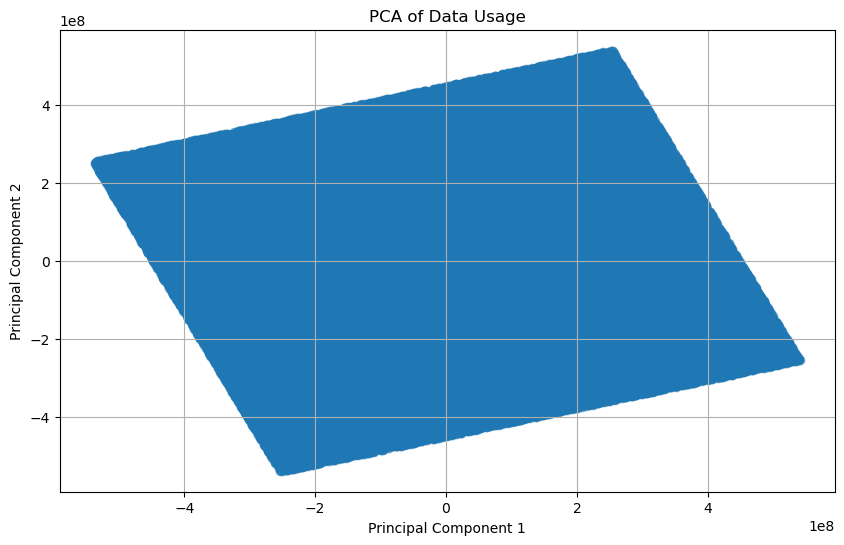

Explained variance by each component: [0.501595   0.49753482]


In [34]:
# Perform a principal component analysis to reduce the dimensions of the data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)  # Reduce to 2 dimensions for simplicity
data_reduced = pca.fit_transform(data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']])

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5)
plt.title('PCA of Data Usage')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

explained_variance = pca.explained_variance_ratio_  # Get the explained variance
print(f"Explained variance by each component: {explained_variance}")



#### Explanation of PCA results
#
Principal Component Analysis (PCA) is a technique used to reduce the dimensionality of data while preserving as much variance as possible. In this analysis, we reduced the data to two principal components, which represent the most significant directions of variance in the original dataset. The explained variance indicates how much information (variance) is captured by each principal component. This helps in understanding the underlying structure of the data and can reveal patterns that may not be apparent in higher dimensions.

#### Interpretation:
- The first principal component captures the most variance in the data, indicating the most important features.
- The second principal component captures the next most variance, providing additional insights.
- Dimensionality reduction helps to simplify the data, making it easier to visualize and analyze.
- This analysis can be used to identify patterns and relationships between variables that might not be apparent in the original data.
